# Perceptron

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#On-revient-au-cours" data-toc-modified-id="On-revient-au-cours-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>On revient au cours</a></span></li><li><span><a href="#Remplacement-de-la-fonction-à-seuil-par-sigmoid" data-toc-modified-id="Remplacement-de-la-fonction-à-seuil-par-sigmoid-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Remplacement de la fonction à seuil par sigmoid</a></span></li></ul></div>

# Apprentissage de la fonction AND

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(1)

In [2]:
# Dataset: AND function
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = [0, 0, 0, 1]

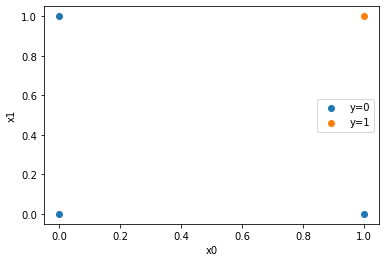

In [3]:
def plot_dataset(X, y):
    X0 = np.array([x for x, y in zip(X, y) if y==0])
    X1 =  np.array([x for x, y in zip(X, y) if y==1])
    if len(X0)>0: plt.scatter(X0[:,0], X0[:,1], label="y=0")
    if len(X1)>0: plt.scatter(X1[:,0], X1[:,1], label="y=1")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.legend()

plot_dataset(X, y)
plt.show()

In [4]:
n = 0.1              # Learning rate
A = [0.1, 0.2, 0.05] # Initial weigth

In [5]:
def predict(X, A):
    y_hat = np.dot(A, X)
    if y_hat > 0:
        y_hat = 1
    else:
        y_hat = 0
    return y_hat

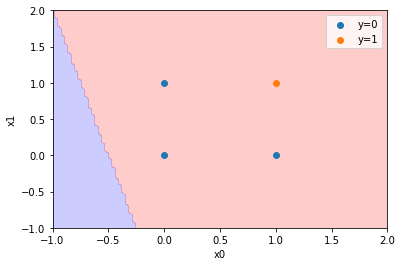

In [6]:
def plot_space(A, threshold=0.5):
    xx, yy = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
    Z = np.array([predict([1,x0,x1], A) for x0, x1 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='red', alpha=0.2)
    plt.contourf(xx, yy, Z, levels=[Z.min(), threshold],
                         colors='blue', alpha=0.2)
    #a = plt.contour(xx, yy, Z, levels=[threshold],
    #                        linewidths=2, colors='red', alpha=0.2)
    plot_dataset(X, y)
    
plot_space(A)

In [7]:
def one_observation(X, y, A):
    # Accept one observation X and y and a weigth matrix A
    X = np.array([1]+list(X))
    y_hat = predict(X, A)
    error = (y-y_hat)
    # Return the new weigth matrix
    return [a + n*error*x for x, a in zip(X,A)]

In [8]:
one_observation(X[0], y[0], A)

[0.0, 0.2, 0.05]

In [9]:
one_observation(X[2], y[2], A)

[0.0, 0.1, 0.05]

In [10]:
def one_epoch(X, y, A):
    # Update weigth for all observation
    # Plot the new space
    # And return the new weigth
    for X_, y_ in zip(X, y):
        A = one_observation(X_, y_, A)
    plot_space(A)
    return A

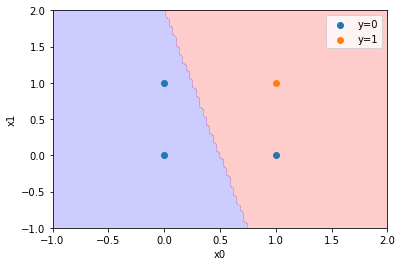

In [11]:
A = one_epoch(X, y, A)

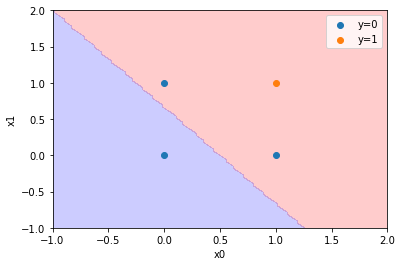

In [12]:
A = one_epoch(X, y, A)

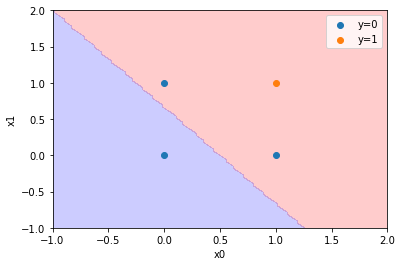

In [12]:
A = one_epoch(X, y, A)

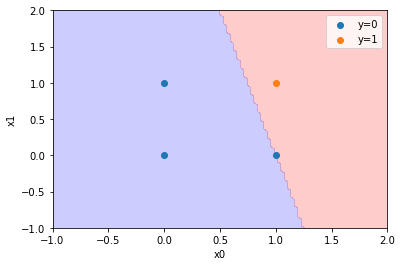

In [13]:
A = one_epoch(X, y, A)

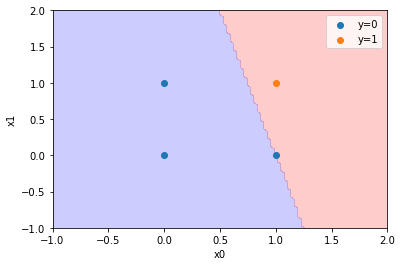

In [14]:
A = one_epoch(X, y, A)

## On revient au cours

## Remplacement de la fonction à seuil par sigmoid

$g(v) = \frac{1}{1+e^{-v}}$, $g(v)$ est une estimation de P(y|X)]

La règle de décision devient : si g(v)>0.5 alors y=1 sinon y=0

La fonction de transfert (g(v)) est dérivable : $g'(v) = g(v)(1-g(v)))$

La règle de mise à jour devient : $a_j = a_j - n(y-\hat{y})g'(v)x_j$

In [ ]:
# Dataset: AND function
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = [0, 0, 0, 1]

In [ ]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_derivative(X):
    return sigmoid(X)*(1-sigmoid(X))

def one_observation(X, y, A):
    X = np.array([1]+list(X))
    g = sigmoid(np.dot(A, X))
    if g > 0.5:
        y_hat = 1
    else:
        y_hat = 0
    error = (y-y_hat)
    print("error", error)
    return [a + n*error*sigmoid_derivative(g)*x for x, a in zip(X,A)]

In [ ]:
n = 0.15
A = [0.1, 0.2, 0.05]

In [ ]:
one_observation(X[0], y[0], A)

In [ ]:
one_observation(X[2], y[2], A)

In [ ]:
plot_space(A)

In [ ]:
A = one_epoch(X, y, A)

In [ ]:
A = one_epoch(X, y, A)

In [ ]:
A = one_epoch(X, y, A)

In [ ]:
A = one_epoch(X, y, A)

In [ ]:
A = one_epoch(X, y, A)

In [ ]:
A = one_epoch(X, y, A)